
# Training The CNN to identify karstified areas


In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

import keras

import os

## Importing the Data

In [2]:
path = "D:/Masterarbeit/Data/Randbereiche/data.npz"
filename = "data.npz"
categorical = True
class_weighted = False
batch_size = 2

In [3]:
from Data import get_data_from_npz, get_class_weights, get_datagen

In [4]:
train_examples, test_examples, train_labels_category, test_labels_category = get_data_from_npz(path, filename, categorical)

In [5]:
datagen = get_datagen()

In [6]:
#class_weights = get_class_weights(train_labels_category)

In [6]:
print(train_examples.shape)
print(test_labels_category.shape)

train_labels_category = train_labels_category.reshape(11731,100,100,2)
test_labels_category = test_labels_category.reshape(2933,100,100,2)

print(test_labels_category.shape)
print("number of samples:" + str(test_examples.shape[0] + train_examples.shape[0]))

(11731, 100, 100, 3)
(2933, 10000, 2)
(2933, 100, 100, 2)
number of samples:14664


In [14]:
datagen = keras.preprocessing.image.ImageDataGenerator()

In [11]:
batches = datagen.flow(train_examples ,train_labels_category , batch_size = batch_size)

x_batch , y_batch = next(batches)

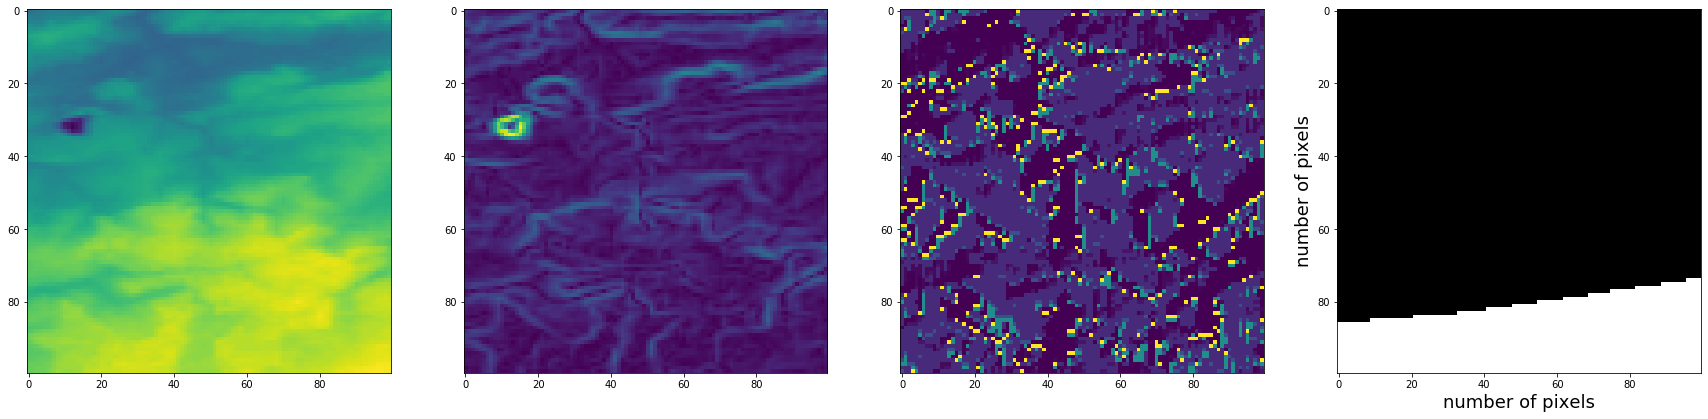

In [51]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("C:/Users/Veigel/Pictures/Memos/first_batch.pdf") as pdf:
    for i in range (0,1):
        
        dgm = x_batch[i][:,:,0]        
        slope = x_batch[i][:,:,1]
        flowdir = x_batch[i][:,:,2]
        
        mask = y_batch[i] #.reshape(100,100,2)
        mask = mask[:,:,1]


        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(30,15))
        im1 = ax1.imshow(dgm)
        im2 = ax2.imshow(slope)
        im2 = ax3.imshow(flowdir)
        im3 = ax4.imshow(mask, cmap = "Greys")

        
        plt.xlabel('number of pixels', fontsize=18)
        plt.ylabel('number of pixels', fontsize=18)
        
        pdf.savefig(fig)

In [52]:
plt.close(fig="all")

## Setting training Parameters

In [82]:
num_epochs = 4
batch_size = 2
num_samples = train_examples.shape[0]
num_samples_val = test_examples.shape[0]
steps_per_epoch = num_samples/batch_size
val_steps = num_samples_val/batch_size
n_labels = 2

### Import the model

In [17]:
from Model import make_KaI

In [101]:
model = make_KaI((100,100,3),2)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 128, 128, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 128, 128, 32) 896         zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 32) 128         conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation

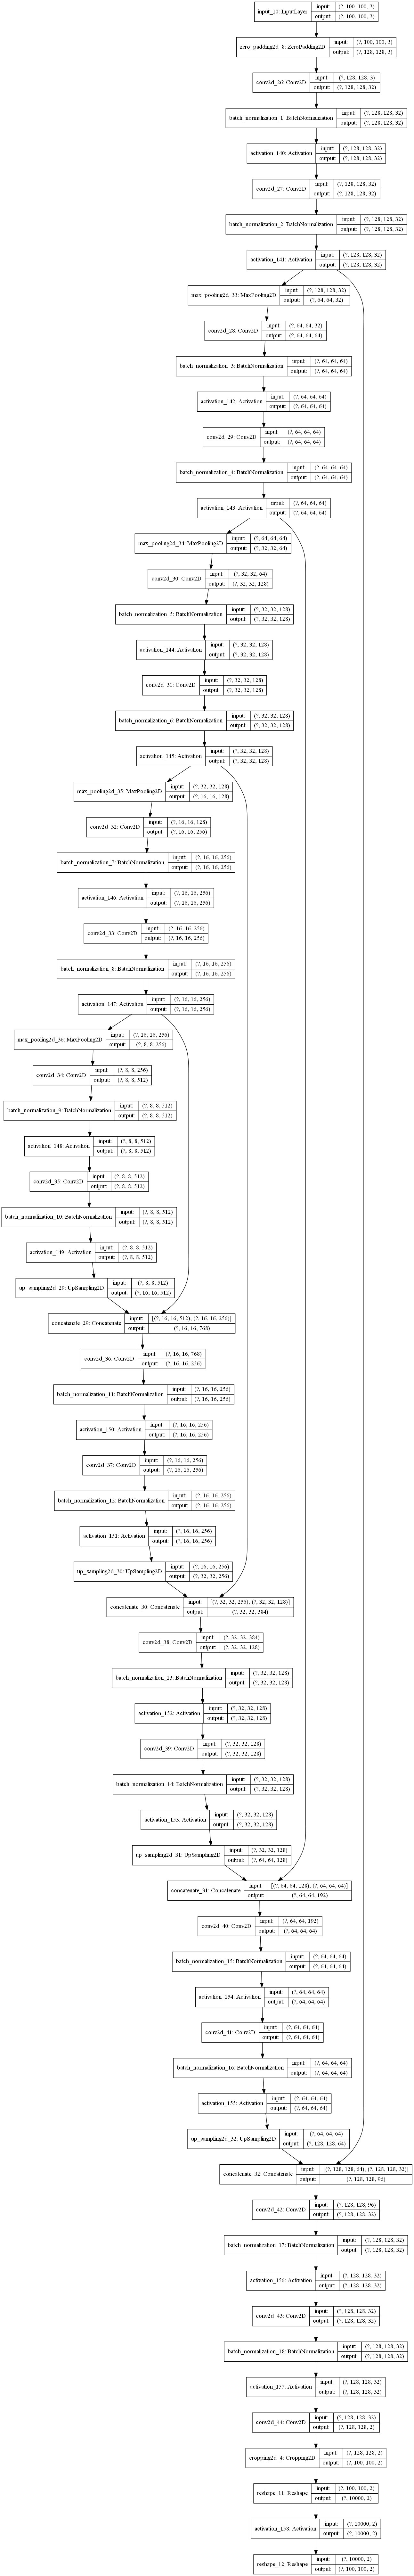

In [102]:
import pydotplus
import keras.utils
keras.utils.vis_utils.pydot = pydotplus
tf.keras.utils.plot_model(model, to_file="D:/Masterarbeit/Data/Randbereiche/model_full_unpool.png", show_shapes=True)

### Compile the model
    - which optimizer is apropriate for the Data?
    - is the loss function adequate?

In [103]:
sgd = keras.optimizers.SGD(lr=1e-5)
adam = keras.optimizers.adam(lr=1e-5)
adadelta = keras.optimizers.Adadelta(lr=1e-5)

In [104]:
model.compile(optimizer=adam,
              loss="binary_crossentropy",
              metrics=["binary_accuracy"])
             #sample_weight_mode = "temporal")

### Fit the model 

In [105]:
checkpointer = keras.callbacks.ModelCheckpoint(filepath="D:/Masterarbeit/Data/Randbereiche/best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [29]:
history = model.fit_generator(datagen.flow(train_examples,train_labels_category , batch_size = batch_size, shuffle=True),
                    steps_per_epoch = steps_per_epoch,          
                    epochs=num_epochs,  
                    callbacks=[checkpointer],
                    validation_data = datagen.flow(test_examples,test_labels_category, shuffle = True ),
                    validation_steps = val_steps)

Epoch 1/20
5866/5865 [==============================] - 914s 156ms/step - loss: 0.6924 - categorical_accuracy: 0.5191 - val_loss: 0.6943 - val_categorical_accuracy: 0.5172
Epoch 2/20
   2/5865 [..............................] - ETA: 6:38 - loss: 0.6907 - categorical_accuracy: 0.5416

C:\Users\Veigel\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


5866/5865 [==============================] - 916s 156ms/step - loss: 0.6924 - categorical_accuracy: 0.5192 - val_loss: 0.6949 - val_categorical_accuracy: 0.5171
Epoch 3/20
5866/5865 [==============================] - 913s 156ms/step - loss: 0.6924 - categorical_accuracy: 0.5192 - val_loss: 0.6928 - val_categorical_accuracy: 0.5173
Epoch 4/20
5866/5865 [==============================] - 914s 156ms/step - loss: 0.6924 - categorical_accuracy: 0.5192 - val_loss: 0.6927 - val_categorical_accuracy: 0.5172
Epoch 5/20
5866/5865 [==============================] - 911s 155ms/step - loss: 0.6924 - categorical_accuracy: 0.5192 - val_loss: 0.6928 - val_categorical_accuracy: 0.5173
Epoch 6/20
5866/5865 [==============================] - 908s 155ms/step - loss: 0.6924 - categorical_accuracy: 0.5192 - val_loss: 0.6928 - val_categorical_accuracy: 0.5169
Epoch 7/20
5866/5865 [==============================] - 913s 156ms/step - loss: 0.6924 - categorical_accuracy: 0.5192 - val_loss: 0.6927 - val_categori

In [ ]:
history = model.fit(train_examples,train_labels_category , batch_size = batch_size,
                    epochs=num_epochs,  
                    callbacks=[checkpointer],
                    validation_data = (test_examples,test_labels_category ))

Train on 11731 samples, validate on 2933 samples
Epoch 1/4
  998/11731 [=>............................] - ETA: 1:56:02 - loss: 0.7091 - binary_accuracy: 0.4890

## View training history

In [57]:
print(history.history.keys())

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


In [34]:
model.save("D:/Masterarbeit/Data/Randbereiche/CNN_06.hdf5")

C:\Users\Veigel\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
C:\Users\Veigel\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


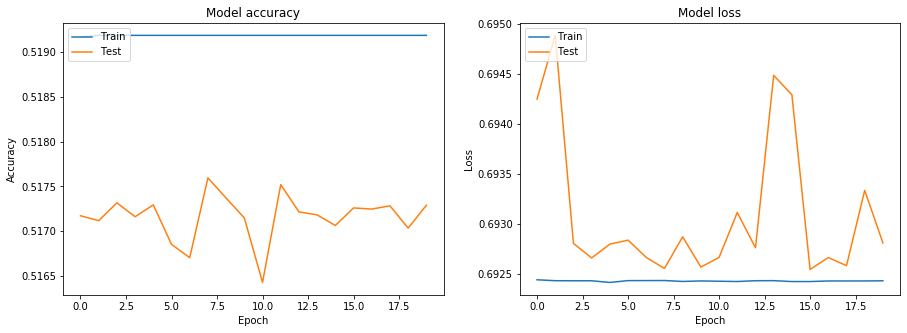

In [54]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("C:/Users/Veigel/Pictures/Memos/training_loss_acc.pdf") as pdf:
# Plot training & validation accuracy values
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(history.history['categorical_accuracy'])
    ax1.plot(history.history['val_categorical_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')
    fig.show()
        
        # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    fig.show()
    pdf.savefig(fig)

In [55]:
plt.close(fig="all")

## Make Predictions

In [58]:
predictions = model.predict(test_examples)
#preds_reshape = predictions.reshape(num_samples_val, 100,100,2)

In [74]:
preds = np.argmax(predictions, axis=-1)

In [75]:
#print(preds_reshape.shape)
print(preds.shape)
#print(preds_reshape[19,:,:,0])
print(preds[19,:,:])

(2933, 100, 100)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Visualize Predictions

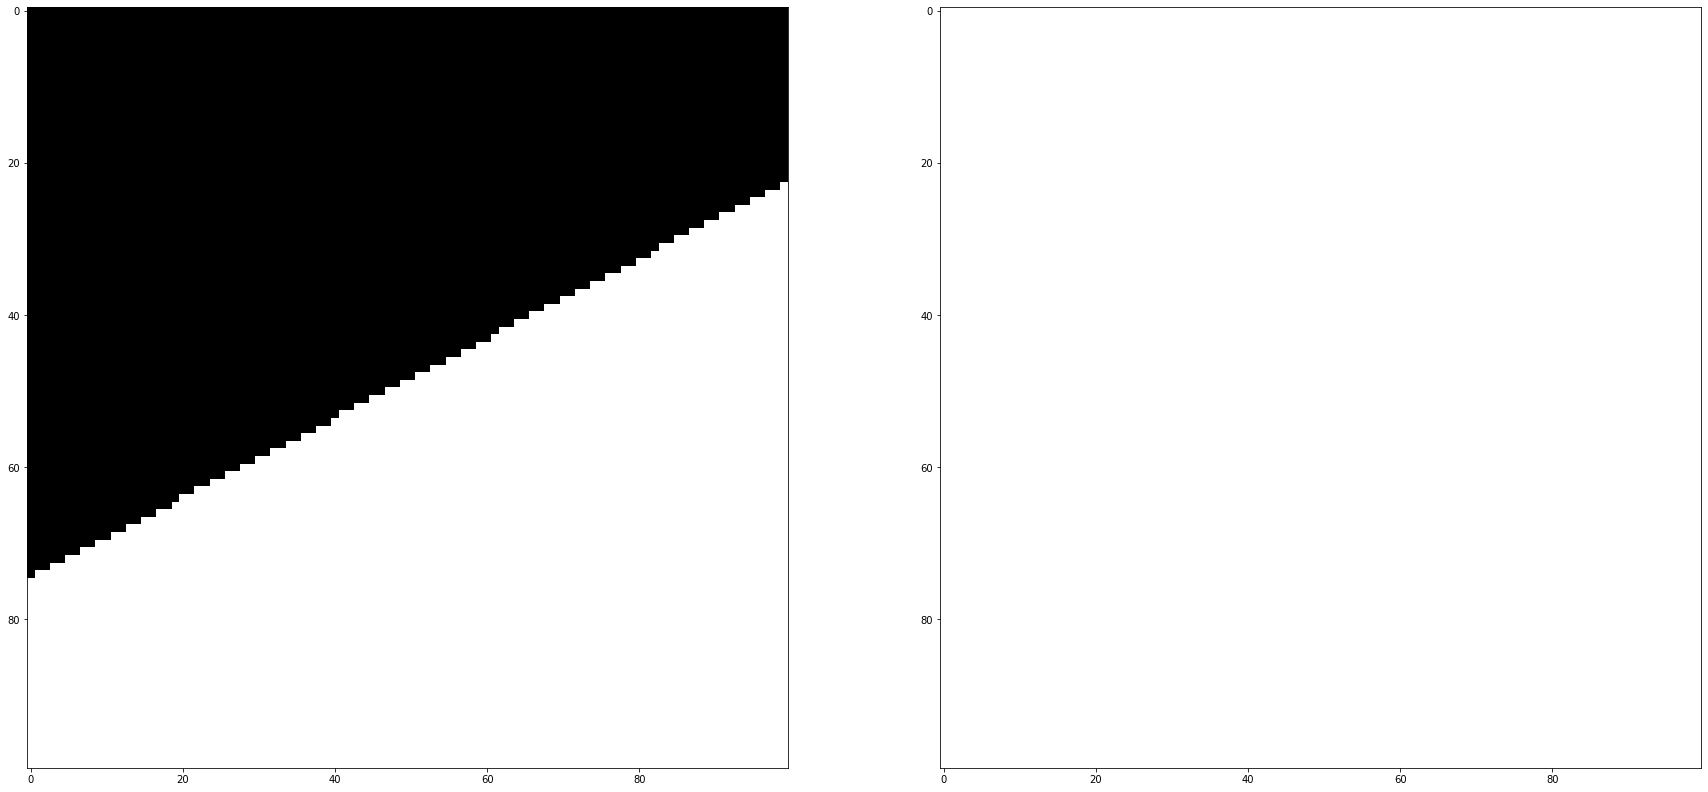

In [79]:
test_labels = test_labels_category.reshape(num_samples_val, 100,100,2)
mask = test_labels[1000,:,:,0]
predicted = preds[1000,:,:]

with PdfPages("C:/Users/Veigel/Pictures/Memos/predictions.pdf") as pdf:

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,15))
    im1 = ax1.imshow(mask, cmap = "binary")
    im2 = ax2.imshow(predicted, cmap = "binary")
    plt.show()
    pdf.savefig(fig)

In [80]:
plt.close(fig="all")